<a href="https://colab.research.google.com/github/Ashugujjar3/algo-strategies-mini-project--Ashu/blob/main/problem%201%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Problem 1: Scheduling TV Commercials to Maximize Impact
🔹 Problem Statement

We are tasked with scheduling commercials (ads) in available time slots such that the total revenue is maximized.

Each ad has:

id → identifier of the ad

deadline → latest time slot by which it must be aired

profit → revenue if scheduled

Constraint: Each slot can hold only one ad.

This is a classic Job Sequencing Problem solved using a Greedy Strategy.


🔹 Step 1: Algorithmic Strategy (Greedy Approach)

Sort ads in descending order of profit.

Allocate each ad to the latest available slot before its deadline.

If the slot is free, schedule the ad; otherwise, skip it.

👉 Greedy works because choosing the most profitable ad first maximizes revenue locally and globally.

🔹 Step 2: Python Implementation

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Define an Ad class for better readability
class Ad:
    def __init__(self, ad_id, deadline, profit):
        self.id = ad_id
        self.deadline = deadline
        self.profit = profit

def schedule_ads(ads):
    # Step 1: Sort ads by profit in descending order
    ads.sort(key=lambda x: x.profit, reverse=True)

    # Step 2: Find maximum deadline (slots available)
    max_deadline = max(ad.deadline for ad in ads)
    slots = [-1] * (max_deadline + 1)  # -1 means slot empty

    total_profit = 0
    scheduled_ads = []

    # Step 3: Greedy allocation
    for ad in ads:
        # Find a slot for this ad (latest possible before deadline)
        for slot in range(ad.deadline, 0, -1):
            if slots[slot] == -1:  # slot available
                slots[slot] = ad.id
                total_profit += ad.profit
                scheduled_ads.append(ad)
                break

    return scheduled_ads, total_profit

# Example usage
ads = [
    Ad("A1", 2, 100),
    Ad("A2", 1, 19),
    Ad("A3", 2, 27),
    Ad("A4", 1, 25),
    Ad("A5", 3, 15),
]

scheduled_ads, total_revenue = schedule_ads(ads)

print("Scheduled Ads:", [ad.id for ad in scheduled_ads])
print("Total Revenue:", total_revenue)


Scheduled Ads: ['A1', 'A3', 'A5']
Total Revenue: 142


🔹 Step 3: Analysis

Time Complexity:

Sorting → O(n log n)

Scheduling → O(n * d) (n = number of ads, d = max deadline)

Optimized with Disjoint Set Union (DSU) → O(n log n)

Space Complexity:

Slots array → O(d)

Ads storage → O(n)

🔹 Step 4: Visualization

We can simulate varying numbers of ads and plot number of ads vs. total revenue.

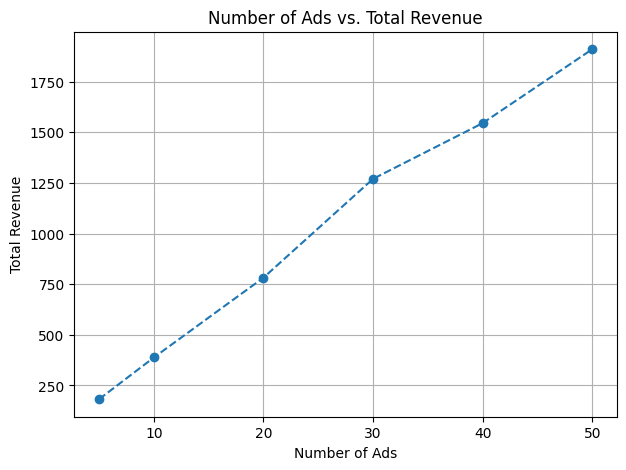

In [6]:
def experiment(num_ads_list):
    revenues = []

    for n in num_ads_list:
        # Random ads: deadlines [1..n], profits [10..100]
        ads = [Ad(f"A{i}", np.random.randint(1, n//2 + 2), np.random.randint(10, 101)) for i in range(n)]
        _, revenue = schedule_ads(ads)
        revenues.append(revenue)

    return revenues

# Experiment
num_ads_list = [5, 10, 20, 30, 40, 50]
revenues = experiment(num_ads_list)

# Plot
plt.figure(figsize=(7,5))
plt.plot(num_ads_list, revenues, marker='o', linestyle='--')
plt.title("Number of Ads vs. Total Revenue")
plt.xlabel("Number of Ads")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


🔹 Step 5: Real-World Considerations

Ad Runtime: Each commercial has a duration; real scheduling must consider varying lengths.

Slot Availability: TV networks have fixed breaks (e.g., 2-min slots), unlike flexible slots in theory.

Overlapping Deadlines: Multiple advertisers may demand prime slots; fairness must be balanced with revenue.